In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score


In [2]:
df = pd.read_csv(r"C:\Users\jothi\Desktop\GUVI PROJECT_4\vocal_gender_features_new.csv")  # Replace with your actual file


In [3]:
df.head()

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
0,2247.331739,1158.537748,1870.415462,370.405241,21.440710,0.036879,4419.438073,0.169241,0.082552,1592.1033,...,21.736240,2.303085,8.983318,-17.410305,9.115154,0.301804,10.452693,-3.080832,10.146248,0
1,1790.719889,996.554825,1757.898617,410.710318,21.513383,0.018936,3635.742188,0.108068,0.055477,1112.6351,...,13.937135,-0.953942,10.831742,-0.088775,10.297690,-7.281142,10.926579,-0.450248,8.489134,0
2,1977.923363,1010.148667,1747.099555,461.458379,20.476283,0.032616,3873.291016,0.144633,0.060388,1557.5225,...,14.900779,0.260098,14.031009,-0.420670,10.810292,-0.199829,11.986182,3.372986,9.285437,0
3,2037.765550,1311.440630,1745.224852,419.056484,19.516014,0.028482,3826.584507,0.148933,0.029559,1481.0868,...,15.957924,-1.486122,14.461978,-8.479608,12.550333,3.997028,9.912608,-6.946966,10.574301,0
4,1739.383829,1092.623322,1623.135563,450.088465,20.260620,0.025737,3452.903892,0.117961,0.069078,1424.5352,...,15.105562,-3.366364,13.943447,-6.561539,11.944948,1.410639,13.110976,-3.252258,9.866687,0


In [4]:
df.isnull().sum()

mean_spectral_centroid     0
std_spectral_centroid      0
mean_spectral_bandwidth    0
std_spectral_bandwidth     0
mean_spectral_contrast     0
mean_spectral_flatness     0
mean_spectral_rolloff      0
zero_crossing_rate         0
rms_energy                 0
mean_pitch                 0
min_pitch                  0
max_pitch                  0
std_pitch                  0
spectral_skew              0
spectral_kurtosis          0
energy_entropy             0
log_energy                 0
mfcc_1_mean                0
mfcc_1_std                 0
mfcc_2_mean                0
mfcc_2_std                 0
mfcc_3_mean                0
mfcc_3_std                 0
mfcc_4_mean                0
mfcc_4_std                 0
mfcc_5_mean                0
mfcc_5_std                 0
mfcc_6_mean                0
mfcc_6_std                 0
mfcc_7_mean                0
mfcc_7_std                 0
mfcc_8_mean                0
mfcc_8_std                 0
mfcc_9_mean                0
mfcc_9_std    

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
X_train,X_test,y_train,y_test = train_test_split(df.drop(['label'],axis=1),df['label'])


In [8]:
from sklearn.preprocessing import StandardScaler

    # Initialize StandardScaler
scaler = StandardScaler()
# X = mi1.drop(columns="charges")
# Apply StandardScaler only to the 'Age' column
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

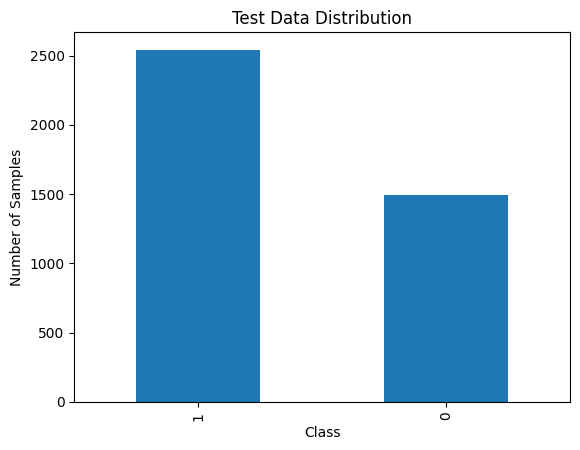

In [9]:
y_test.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()


In [12]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
# Oversampling using SMOTE
from imblearn.over_sampling import SMOTE


smt = SMOTE()


X_train_smsampled, y_train_smsampled= smt.fit_resample(X_train, y_train)


print('After Oversampling')
print(y_train_smsampled.value_counts())

After Oversampling
label
1    7838
0    7838
Name: count, dtype: int64


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

# Train the model
model = LogisticRegression()
model.fit(X_train_smsampled, y_train_smsampled)

# Print model parameters
print("Model Parameters:")
print(model.get_params())

# Predictions
y_pred_train = model.predict(X_train_smsampled)
y_pred_test = model.predict(X_test)

# Compute metrics
f1_train = f1_score(y_train_smsampled, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train_smsampled, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_train = precision_score(y_train_smsampled, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)
recall_train = recall_score(y_train_smsampled, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)

# Print metrics
print("\nTraining Metrics:")
print(f"F1 Score: {f1_train}")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")

print("\nTesting Metrics:")
print(f"F1 Score: {f1_test}")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")

# Print full classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

Model Parameters:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Training Metrics:
F1 Score: 0.994639438417358
Accuracy: 0.9946414901760653
Precision: 0.9950204290091931
Recall: 0.9942587394743557

Testing Metrics:
F1 Score: 0.993705743509048
Accuracy: 0.9920733217735943
Precision: 0.993705743509048
Recall: 0.993705743509048

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1495
           1       0.99      0.99      0.99      2542

    accuracy                           0.99      4037
   macro avg       0.99      0.99      0.99      4037
weighted avg       0.99      0.99      0.99      4037



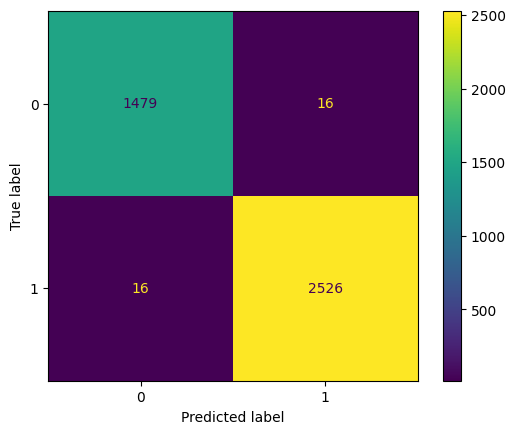

In [15]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


y_pred = model.predict(X_test)
con_mat = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(con_mat).plot()

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the SVM model
model_svm = SVC(kernel='rbf', probability=True)
model_svm.fit(X_train, y_train)

# Print all model parameters
print("Model Parameters:")
print(model_svm.get_params())

# Predictions
y_pred_train = model_svm.predict(X_train_smsampled)
y_pred_test = model_svm.predict(X_test)

# Compute evaluation metrics
accuracy_train = accuracy_score(y_train_smsampled, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train_smsampled, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)

recall_train = recall_score(y_train_smsampled, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)

f1_train = f1_score(y_train_smsampled, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

# Print training and testing metrics
print("\nTraining Metrics:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")

print("\nTesting Metrics:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")

# Print full classification report for test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

Model Parameters:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Training Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Testing Metrics:
Accuracy: 0.9992568739162745
Precision: 0.9992135273299253
Recall: 0.9996066089693155
F1 Score: 0.9994100294985251

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1495
           1       1.00      1.00      1.00      2542

    accuracy                           1.00      4037
   macro avg       1.00      1.00      1.00      4037
weighted avg       1.00      1.00      1.00      4037



In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the XGBoost model
model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10,Randomstate=42)
model_xgb.fit(X_train_smsampled, y_train_smsampled)

# Print all model parameters
print("Model Parameters:")
print(model_xgb.get_params())

# Predictions
y_pred_train = model_xgb.predict(X_train_smsampled)
y_pred_test = model_xgb.predict(X_test)

# Compute evaluation metrics
accuracy_train = accuracy_score(y_train_smsampled, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train_smsampled, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)

recall_train = recall_score(y_train_smsampled, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)

f1_train = f1_score(y_train_smsampled, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

# Print training and testing metrics
print("\nTraining Metrics:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")

print("\nTesting Metrics:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")

# Print full classification report for test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

c:\Users\jothi\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:17:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "Randomstate" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model Parameters:
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 10, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'Randomstate': 42}

Training Metrics:
Accuracy: 1.0
Precision

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the KNN model
model_knn = DecisionTreeClassifier(max_depth=4, random_state=42)
model_knn.fit(X_train_smsampled, y_train_smsampled)

# Print all model parameters
print("Model Parameters:")
print(model_knn.get_params())

# Predictions
y_pred_train = model_knn.predict(X_train_smsampled)
y_pred_test = model_knn.predict(X_test)

# Compute evaluation metrics
accuracy_train = accuracy_score(y_train_smsampled, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train_smsampled, y_pred_train, average='weighted')
precision_test = precision_score(y_test, y_pred_test, average='weighted')

recall_train = recall_score(y_train_smsampled, y_pred_train, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')

f1_train = f1_score(y_train_smsampled, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Print training and testing metrics
print("\nTraining Metrics:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")

print("\nTesting Metrics:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")

# Print full classification report for test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

Model Parameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}

Training Metrics:
Accuracy: 0.9184103087522327
Precision: 0.9185869234696411
Recall: 0.9184103087522327
F1 Score: 0.9184017015433026

Testing Metrics:
Accuracy: 0.900668813475353
Precision: 0.9015341164776773
Recall: 0.900668813475353
F1 Score: 0.9009740009730631

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1495
           1       0.93      0.91      0.92      2542

    accuracy                           0.90      4037
   macro avg       0.89      0.90      0.89      4037
weighted avg       0.90      0.90      0.90      4037



In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_smsampled, y_train_smsampled)

# Print all model parameters
print("Model Parameters:")
print(model_rf.get_params())

# Predictions
y_pred_train = model_rf.predict(X_train_smsampled)
y_pred_test = model_rf.predict(X_test)

# Compute evaluation metrics
accuracy_train = accuracy_score(y_train_smsampled, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train_smsampled, y_pred_train, average='weighted')
precision_test = precision_score(y_test, y_pred_test, average='weighted')

recall_train = recall_score(y_train_smsampled, y_pred_train, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')

f1_train = f1_score(y_train_smsampled, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Print training and testing metrics
print("\nTraining Metrics:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")

print("\nTesting Metrics:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")

# Print full classification report for test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

Model Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Training Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Testing Metrics:
Accuracy: 0.9975229130542482
Precision: 0.9975285745193132
Recall: 0.9975229130542482
F1 Score: 0.9975215362009694

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1495
           1       1.00      1.00      1.00      2542

    accuracy                           1.00      4037
   macro avg       1.00      1.00      1.00      4037
weighted avg       1.00      1.00      1.00      4037


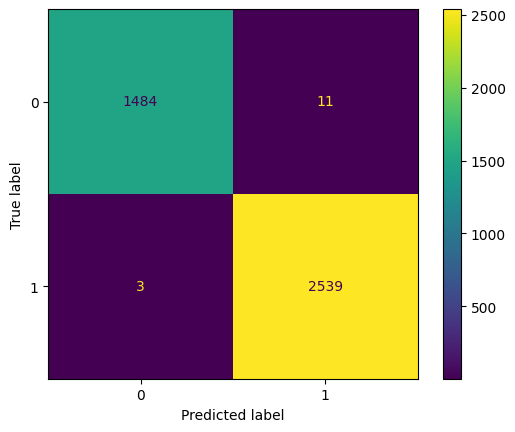

In [20]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


y_pred = model_xgb.predict(X_test)
con_mat = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(con_mat).plot()

In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
import mlflow
import mlflow.sklearn
import mlflow.xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import webbrowser

# Define your models
models = {
    "LogisticRegression(sm)": LogisticRegression(),
    "XGBoost(sm)": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42),
    "RandomForest(sm)": RandomForestClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42),
    "svc_model(sm)": SVC(kernel='rbf', probability=True),
    "DecisionTree(sm)": DecisionTreeClassifier(max_depth=4, random_state=42)
}

# Set tracking URI and experiment
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("Voice Classification Model")

# Train and log each model
for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        # Train model
        model.fit(X_train_smsampled, y_train_smsampled)
        
        y_pred_train = model.predict(X_train_smsampled)
        y_pred_test = model.predict(X_test)

        # Evaluate metrics
        metrics = {
            "accuracy_train": accuracy_score(y_train_smsampled, y_pred_train),
            "precision_train": precision_score(y_train_smsampled, y_pred_train, average='weighted'),
            "recall_train": recall_score(y_train_smsampled, y_pred_train, average='weighted'),
            "f1_train": f1_score(y_train_smsampled, y_pred_train, average='weighted'),
            "accuracy_test": accuracy_score(y_test, y_pred_test),
            "precision_test": precision_score(y_test, y_pred_test, average='weighted'),
            "recall_test": recall_score(y_test, y_pred_test, average='weighted'),
            "f1_test": f1_score(y_test, y_pred_test, average='weighted'),
        }

        # Log model type
        mlflow.set_tag("model_name", model_name)

        # Log metrics
        for metric_name, value in metrics.items():
            mlflow.log_metric(metric_name, value)

        # Log model
        if model_name == "XGBoost(sm)":
            mlflow.xgboost.log_model(model, artifact_path=model_name)
        else:
            mlflow.sklearn.log_model(model, artifact_path=model_name)

        print(f"{model_name} logged successfully!")

print("✅ All models are logged in MLflow!")

# Open MLflow UI
webbrowser.open("http://localhost:5000")

In [ ]:
import pickle

# Assuming 'model' is your trained model
with open('model1.pkl', 'wb') as file:
    pickle.dump(model_xgb, file)

In [ ]:
with open('sscaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
def FunctionName(args):
    df = pd.read_csv("C:/Users/shanm/OneDrive/Desktop/project/voice_prediction/vocal_gender_features_new.csv")
X1_train = df.drop(['label'],axis=1)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score,
    mutual_info_score
)


# Step 2: Scale the features
scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_train_smsampled)

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=2)
label1=kmeans.fit_predict(X1_train)
# label1 = kmeans.labels_
# Unsupervised metrics
silhouette = silhouette_score(X1_train, label1)
db_index = davies_bouldin_score(X1_train, label1)
ch_index = calinski_harabasz_score(X1_train, label1)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Index: {db_index:.3f}")
print(f"Calinski-Harabasz Index: {ch_index:.3f}")
# Step 4: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X1_train["mean_spectral_centroid"], X1_train["std_spectral_centroid"], c=label1, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import SpectralClustering

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
label2 = spectral.fit_predict(X1_train)
# Unsupervised metrics
silhouette = silhouette_score(X1_train, label2)
db_index = davies_bouldin_score(X1_train, label2)
ch_index = calinski_harabasz_score(X1_train, label2)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Index: {db_index:.3f}")
print(f"Calinski-Harabasz Index: {ch_index:.3f}")
# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X1_train["mean_spectral_centroid"], X1_train["std_spectral_centroid"], c=label2, cmap='Set1', s=50)
plt.title("Spectral Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import Birch
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score,
    mutual_info_score
)
# Apply Birch clustering
birch = Birch(n_clusters=2)
label4 = birch.fit_predict(X1_train)
# Unsupervised metrics
silhouette = silhouette_score(X1_train, label4)
db_index = davies_bouldin_score(X1_train, label4)
ch_index = calinski_harabasz_score(X1_train, label4)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Index: {db_index:.3f}")
print(f"Calinski-Harabasz Index: {ch_index:.3f}")
# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X1_train["mean_spectral_centroid"], X1_train["std_spectral_centroid"], c=label4, cmap='Dark2', s=50)
plt.title("Birch Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=2, linkage='ward')
label3 = agg.fit_predict(X1_train)
# Unsupervised metrics
silhouette = silhouette_score(X1_train, label3)
db_index = davies_bouldin_score(X1_train, label3)
ch_index = calinski_harabasz_score(X1_train, label3)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Index: {db_index:.3f}")
print(f"Calinski-Harabasz Index: {ch_index:.3f}")
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X1_train["mean_spectral_centroid"], X1_train["std_spectral_centroid"],
            c=label5, cmap='coolwarm', s=50)
plt.title("Agglomerative Clustering")
plt.xlabel("Mean Spectral Centroid")
plt.ylabel("Std Spectral Centroid")
plt.grid(True)
plt.show()

In [ ]:
import mlflow
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score,
    mutual_info_score
)
import webbrowser

models = {
    "kmeans": KMeans(n_clusters=2),
    "spectral":SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans'),
    "birch": Birch(n_clusters=2),
    "agglomerative": AgglomerativeClustering(n_clusters=2, linkage='ward')
    
}

# Set tracking URI and experiment
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("Voice Clustering Model")

# Train and log each model
for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        # Train model
        labels=model.fit_predict(X1_train)
     

        # Evaluate metrics
        metrics = {
            "Silhouette_Score":silhouette_score(X1_train, labels),
            "db_index ": davies_bouldin_score(X1_train, labels),
        
            "ch_index":calinski_harabasz_score(X1_train, labels)

        }

        # Log model type
        mlflow.set_tag("model_name", model_name)

        # Log metrics
        for metric_name, value in metrics.items():
            mlflow.log_metric(metric_name, value)

        # Log model
       
        mlflow.sklearn.log_model(model, artifact_path=model_name)

        print(f"{model_name} logged successfully!")

print("✅ All models are logged in MLflow!")

# Open MLflow UI
webbrowser.open("http://localhost:5000")

In [ ]:
import pickle

# Assuming 'model' is your trained model
with open('model2.pkl', 'wb') as file:
    pickle.dump(kmeans, file)